In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('used_cars_data.csv')
display(df.head())

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [15]:
df['Brand'] = df['Name'].apply(lambda x: x.split(' ')[0])
df['Model'] = df['Name'].apply(lambda x: ' '.join(x.split(' ')[1:]))
display(df.head())

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Wagon R LXI CNG
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,Jazz V
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,Ertiga VDI
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic


In [16]:
display(df.isnull().sum())

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


In [5]:
# Impute missing values
for col in ['Mileage', 'Engine', 'Power', 'Seats']:
    if df[col].dtype == 'object':
        # For categorical columns, impute with mode
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        # For numerical columns, impute with median
        df[col].fillna(df[col].median(), inplace=True)

# Drop columns with a large number of missing values
df.drop(['New_Price', 'Price'], axis=1, inplace=True)

# Verify that missing values have been handled
display(df.isnull().sum())

/tmp/ipython-input-5-1633646611.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-5-1633646611.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


In [6]:
# Impute missing values
for col in ['Mileage', 'Engine', 'Power', 'Seats']:
    if df[col].dtype == 'object':
        # For categorical columns, impute with mode
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        # For numerical columns, impute with median
        df[col] = df[col].fillna(df[col].median())

# Drop columns with a large number of missing values
df.drop(['New_Price', 'Price'], axis=1, inplace=True)

# Verify that missing values have been handled
display(df.isnull().sum())

KeyError: "['New_Price', 'Price'] not found in axis"

In [17]:
for col in ['Mileage', 'Engine', 'Power', 'Seats']:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

cols_to_drop = ['New_Price', 'Price']
df.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')

display(df.isnull().sum())

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


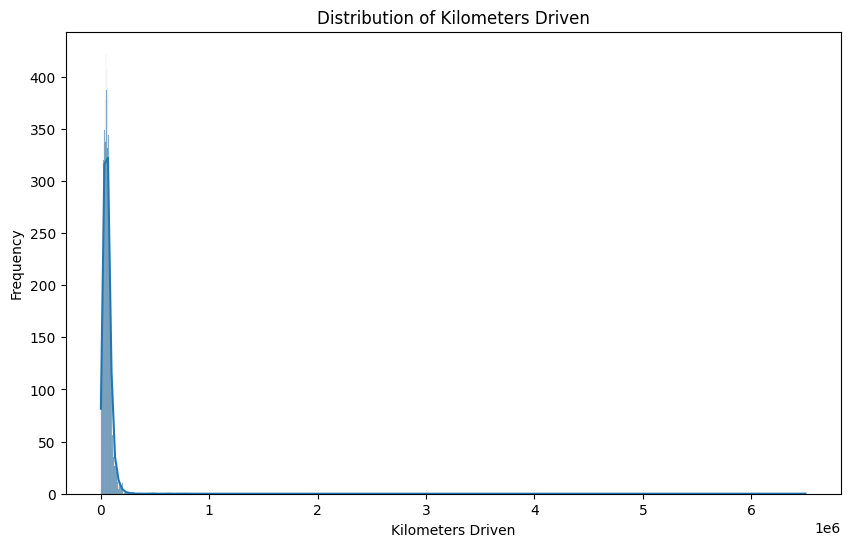

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Kilometers_Driven'], kde=True)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

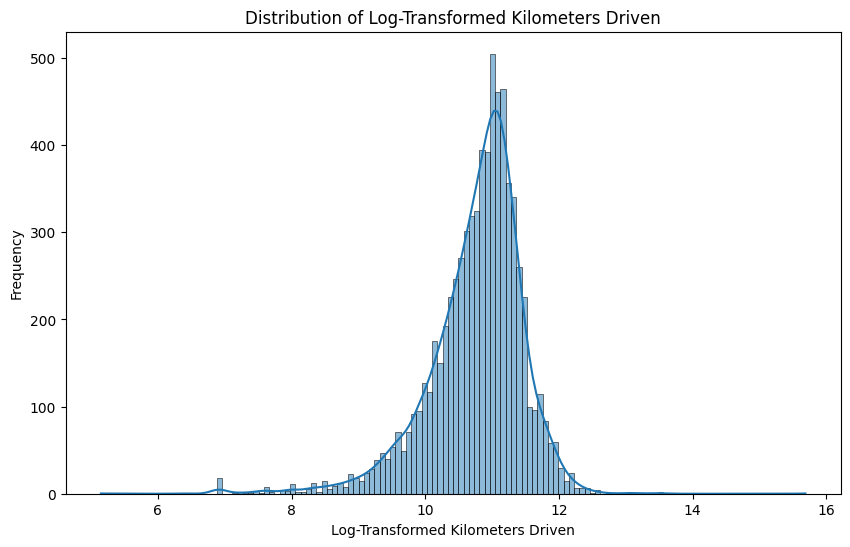

In [19]:
df['Kilometers_Driven_log'] = np.log1p(df['Kilometers_Driven'])

plt.figure(figsize=(10, 6))
sns.histplot(df['Kilometers_Driven_log'], kde=True)
plt.title('Distribution of Log-Transformed Kilometers Driven')
plt.xlabel('Log-Transformed Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

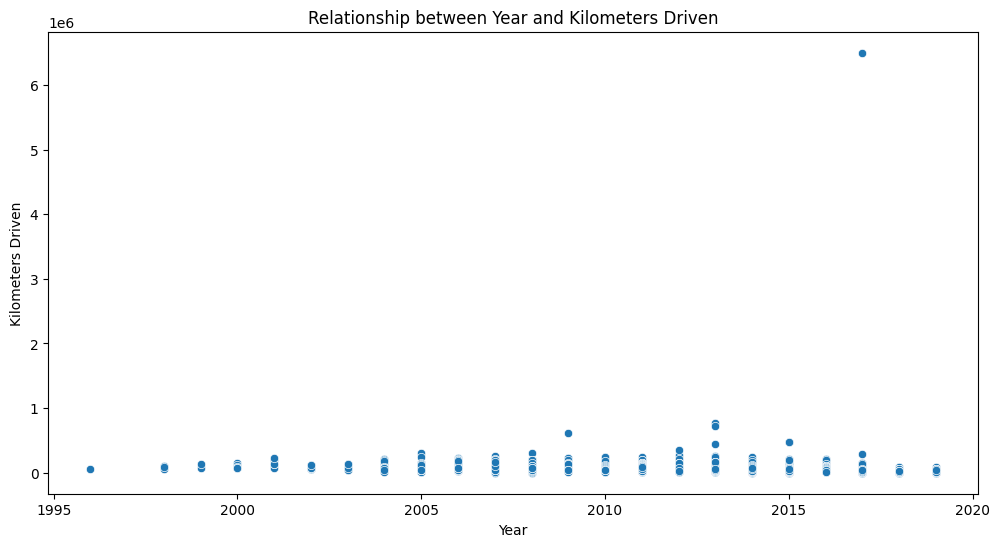

In [20]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='Kilometers_Driven', data=df)
plt.title('Relationship between Year and Kilometers Driven')
plt.xlabel('Year')
plt.ylabel('Kilometers Driven')
plt.show()

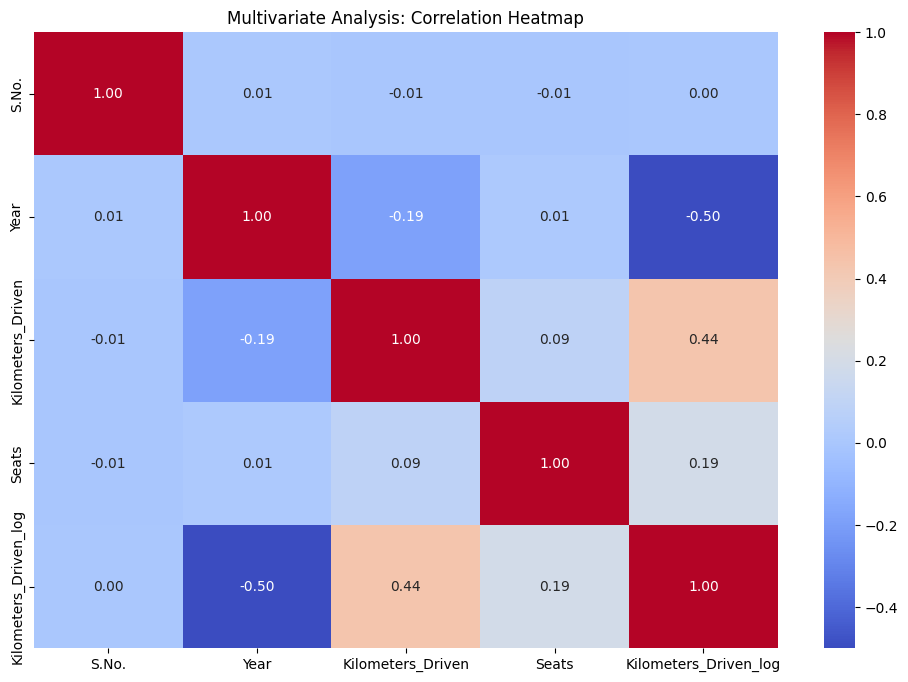

In [21]:
numerical_cols = df.select_dtypes(include=np.number).columns

corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Multivariate Analysis: Correlation Heatmap')
plt.show()